<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h2 style="text-align: center;"><b>Анализ данных по методологии CrispDM</b></h2>

# 2. Подготовка данных
## 2.1 Импорт библиотек

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.cluster import DBSCAN

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
import os
import sys

sys.path.insert(0, '..')

In [73]:
from scripts.data.util import load_dataset, save_dataset

## 2.2 Загрузка данных

In [47]:
wine = load_dataset()
wine.shape

(6497, 13)

## 2.3 Преобразовываем категориальные переменные 

In [48]:
wine['type'] = LabelEncoder().fit_transform(wine['type'])
wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## 2.4 Заполнение пропущенных значений


Заменим пропуски в данных на медиану

In [49]:
wine = wine.fillna(wine.median())
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 2.5 Поиск и удаление выбросов


### 2.5.1 Построим ящики с усами для определения выбросов

<AxesSubplot:>

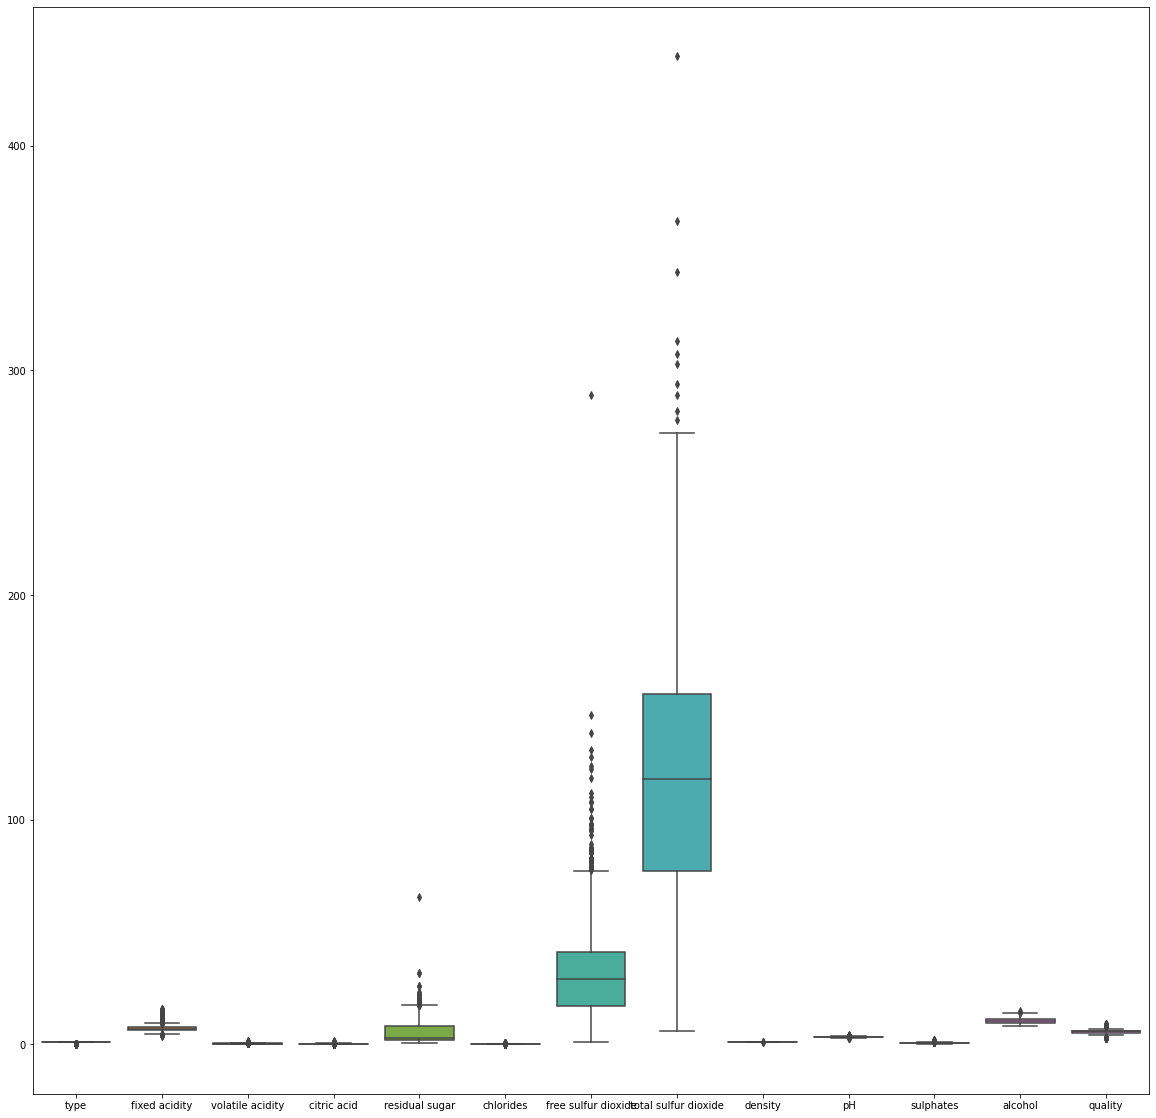

In [50]:
#outlier
plt.figure(figsize=(20,20))
sns.boxplot(data=wine,)

### 2.5.2 Исследуем признаки на выбросы

In [51]:
scaled_features = StandardScaler().fit_transform(wine.values)

In [52]:
db = DBSCAN(eps=4.5, min_samples=10).fit(scaled_features)

In [53]:
# outliers dataframe
outliers = wine[db.labels_ == -1]
print(outliers)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
745      1            7.4             0.200         1.66             2.1   
2781     1            7.8             0.965         0.60            65.8   
4745     1            6.1             0.260         0.25             2.9   
5049     0            9.2             0.520         1.00             3.4   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
745       0.022                 34.0                 113.0  0.99165  3.26   
2781      0.074                  8.0                 160.0  1.03898  3.39   
4745      0.047                289.0                 440.0  0.99314  3.44   
5049      0.610                 32.0                  69.0  0.99960  2.74   

      sulphates  alcohol  quality  
745        0.55     12.2        6  
2781       0.69     11.7        6  
4745       0.64     10.5        3  
5049       2.00      9.4        4  


### 2.5.3 Удалим выбросы

In [54]:
wine_outlier_filtered = wine.drop(wine.index[[db.labels_ == -1]])
wine_outlier_filtered.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2.6 Сборка финальных датасетов для моделирования

### 2.6.1 Variable selection
Выбираем признаки для формирования итогового датасет. У нас доступны признаки:

* 1 - type
* 2 - fixed acidity
* 3 - volatile acidity
* 4 - citric acid
* 5 - residual sugar
* 6 - chlorides
* 7 - free sulfur dioxide
* 8 - total sulfur dioxide
* 9 - density
* 10 - pH
* 11 - sulphates
* 12 - alcohol

In [56]:
X = wine_outlier_filtered.drop('quality', axis=1)
y = wine_outlier_filtered.quality
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### 2.6.2 Нормализуем данные

In [57]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.292683,0.648387,0.059801,0.302405,0.454924,0.598965,0.217054,0.130682,0.115942
1,1.0,0.206612,0.146667,0.276423,0.032258,0.066445,0.089347,0.349515,0.297111,0.449612,0.153409,0.217391
2,1.0,0.355372,0.133333,0.325203,0.203226,0.068106,0.199313,0.252427,0.344545,0.418605,0.125000,0.304348
3,1.0,0.280992,0.100000,0.260163,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.102273,0.275362
4,1.0,0.280992,0.100000,0.260163,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.102273,0.275362


### 2.6.3 Сбалансируем классы (качество)

In [58]:
oversample = SMOTE(k_neighbors=4)

In [59]:
X, y = oversample.fit_resample(X, y)

In [60]:
y.value_counts()

6    2834
5    2834
7    2834
8    2834
4    2834
3    2834
9    2834
Name: quality, dtype: int64

In [61]:
df_prep_data = X
df_prep_data['quality'] = y

In [62]:
df_prep_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.292683,0.648387,0.059801,0.302405,0.454924,0.598965,0.217054,0.130682,0.115942,6
1,1.0,0.206612,0.146667,0.276423,0.032258,0.066445,0.089347,0.349515,0.297111,0.449612,0.153409,0.217391,6
2,1.0,0.355372,0.133333,0.325203,0.203226,0.068106,0.199313,0.252427,0.344545,0.418605,0.125000,0.304348,6
3,1.0,0.280992,0.100000,0.260163,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.102273,0.275362,6
4,1.0,0.280992,0.100000,0.260163,0.254839,0.081395,0.316151,0.499307,0.366106,0.364341,0.102273,0.275362,6


In [69]:
df_prep_data.to_csv('prep_data', encoding='utf-8', index=False)

In [76]:
save_dataset(df_prep_data, 'prep_data.csv', "intermid")